In [1]:
# !pip install opencv-python

## Import dataset and prepare data

In [ ]:
import numpy as np
import pandas as pd
import cv2
from matplotlib import pyplot as plt
from PIL import Image
import os
import random

In [3]:
df = pd.read_csv("train.csv")
base_path = "./images/"

In [4]:
df

,id,landmark_id
0,17660ef415d37059,1
1,92b6290d571448f6,1
2,cd41bf948edc0340,1
3,fb09f1e98c6d2f70,1
4,25c9dfc7ea69838d,7
...,...,...
1580465,72c3b1c367e3d559,203092
1580466,7a6a2d9ea92684a6,203092
1580467,9401fad4c497e1f9,203092
1580468,aacc960c9a228b5f,203092


In [5]:
df=df.loc[df["id"].str.startswith('b1', na= False), :]
num_classes= len(df["landmark_id"].unique())
num_data= len(df)

In [6]:
num_classes

13484

In [7]:
num_data

18321

In [8]:
data = pd.DataFrame(df["landmark_id"].value_counts())
data

,count
landmark_id,
138982,88
126637,29
83144,26
194914,17
149980,16
...,...
76707,1
76738,1
76739,1


In [9]:
data.reset_index(inplace=True)
data.columns=["landmark_id", "count"]
data

,landmark_id,count
0,138982,88
1,126637,29
2,83144,26
3,194914,17
4,149980,16
...,...,...
13479,76707,1
13480,76738,1
13481,76739,1
13482,76752,1


(array([0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0589e+04, 0.0000e+00,
        0.0000e+00, 1.9450e+03, 0.0000e+00, 0.0000e+00, 5.5800e+02,
        0.0000e+00, 0.0000e+00, 2.1100e+02, 0.0000e+00, 0.0000e+00,
        8.1000e+01, 0.0000e+00, 0.0000e+00, 3.3000e+01, 0.0000e+00,
        0.0000e+00, 2.3000e+01, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        9.0000e+00, 0.0000e+00, 0.0000e+00, 1.3000e+01, 0.0000e+00,
        0.0000e+00, 4.0000e+00, 0.0000e+00, 0.0000e+00, 7.0000e+00,
        0.0000e+00, 0.0000e+00, 2.0000e+00, 0.0000e+00, 0.0000e+00,
        3.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        1.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.00

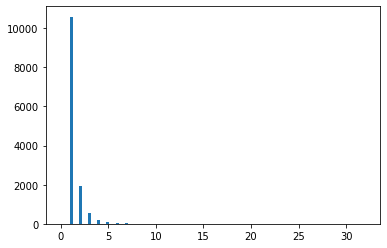

In [10]:
plt.hist(data['count'], 100, range= (0,32), label = 'test')

In [11]:
data['count'].between(0,5).sum()

13384

In [12]:
data['count'].between(5,10).sum()

163

(array([1., 6., 1., ..., 1., 1., 3.]),
 array([2.20000e+01, 2.70000e+01, 6.00000e+01, ..., 2.03045e+05,
        2.03071e+05, 2.03085e+05]),
 <BarContainer object of 13483 artists>)

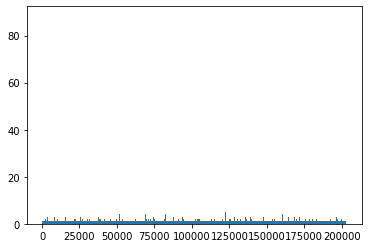

In [13]:
plt.hist(df["landmark_id"], bins=df["landmark_id"].unique())

In [14]:
from sklearn.preprocessing import LabelEncoder
lencoder = LabelEncoder()
lencoder.fit(df["landmark_id"])

LabelEncoder()

In [15]:
def encode_label(label):
    return lencoder.transform(label)

In [16]:
def decode_label(label):
    return lencoder.inverse_transform(label)

In [17]:
def get_image_from_numbers(num, df):
    fname, label = df.iloc[num, :]
    fname = fname + '.jpg'
    f1 = fname[0]
    f2 = fname[1]
    f3 = fname[2]
    full_path = os.path.join(base_path,f1,f2,f3, fname)
    im = cv2.imread(full_path)
    return im, label

4 sample Images from random classes


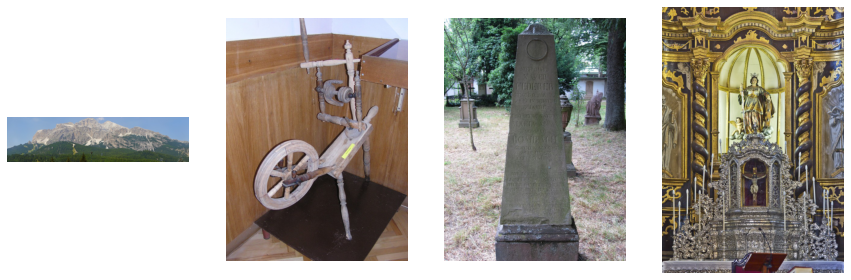

In [18]:
print("4 sample Images from random classes")
fig = plt.figure(figsize=(15,15))
for i in range(1,5):
    ri = random.choices(os.listdir(base_path), k=3)
    folder = base_path + "b/1/" + ri[2]
    random_img = random.choice(os.listdir(folder))
    img = np.array(Image.open(folder + "/" + random_img))
    fig.add_subplot(1,4,i)
    plt.imshow(img)
    plt.axis("off")
plt.show()

## Now building model

In [19]:
import tensorflow as tf
import keras
from keras.applications.vgg19 import VGG19
from keras.layers import *
from keras import Sequential

In [20]:
# Hyper parameter
learning_rate = 0.0001
decay_speed = 1e-6
momentum = 0.9
loss_function = "sparse_categorical_crossentropy"
source_model = VGG19(weights=None)
drop_layer = Dropout(0.5)

In [21]:
model = Sequential()
for layer in source_model.layers[:-1]:
    if layer == source_model.layers[-25]:
        model.add(BatchNormalization())
    model.add(layer)
model.add(Dense(num_classes, activation="softmax"))
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization (BatchN  (None, 224, 224, 3)      12        
 ormalization)                                                   
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)

In [22]:
optim1 = keras.optimizer_v1.RMSprop(lr= learning_rate)
model.compile(optimizer=optim1, loss=loss_function, metrics= ["accuracy"])

In [23]:
def image_reshape(im, target_size):
    return cv2.resize(im, target_size)

In [24]:
def get_batch(dataframe, start, batch_size):
    image_array = []
    label_array = []
    
    end_img = start+batch_size
    if(end_img) > len(dataframe):
        end_img = len(dataframe)
    
    for idx in range(start, end_img):
        n = idx
        im, label = get_image_from_numbers(n, dataframe)
        im = image_reshape(im, (224, 224)) / 255.0
        image_array.append(im)
        label_array.append(label)
    
    label_array = encode_label(label_array)
    
    return np.array(image_array), np.array(label_array)

In [25]:
# split
train, val = np.split(df.sample(frac=1),[int(0.8*len(df))])
print(len(train))
print(len(val))

14656
3665


In [26]:
batch_size = 16
epoch_shuffle = True
weight_classes = True
epochs = 1


In [27]:
for e in range(epochs):
    print("Epoch :" + str (e+1) + "/"+ str(epochs))
    if epoch_shuffle:
        train = train.sample(frac = 1)
    for it in range(int(np.ceil(len(train)/batch_size))):
        X_train, y_train = get_batch(train, it*batch_size, batch_size)
        
        model.train_on_batch(X_train, y_train)
        
model.save("Model")

Epoch :1/1
INFO:tensorflow:Assets written to: Model\assets


In [29]:
# Test
batch_size = 16

errors = 0
good_preds = []
bad_preds = []


for it in range(int(np.ceil(len(val)/batch_size))):
    X_val, y_val = get_batch(val, it*batch_size, batch_size)
    
    result = model.predict(X_val)
    cla = np.argmax(result, axis=1)
    for idx, res in enumerate(result):
        if cla[idx] != y_val[idx]:
            errors = errors + 1
            bad_preds.append([batch_size*it + idx, cla[idx], res[cla[idx]]])
        else:
            good_preds.append([batch_size*it + idx, cla[idx], res[cla[idx]]])



In [30]:
good_preds = np.array(good_preds)
good_preds = np.array(sorted(good_preds, key = lambda x: x[2], reverse=True))

In [36]:
len(good_preds)

16

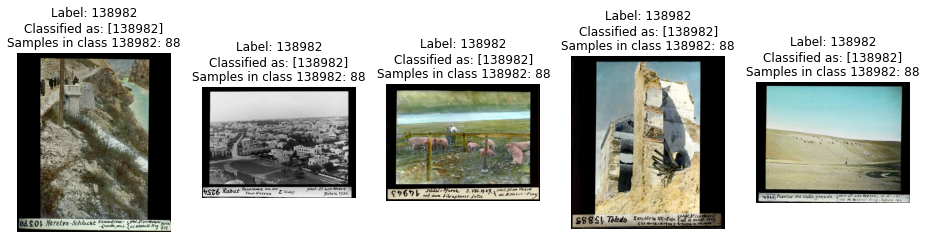

In [43]:
fig=plt.figure(figsize=(16,16))
for i in range(7, 12):
    n = int(good_preds[i,0])
    img, lbl = get_image_from_numbers(n, val)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    fig.add_subplot(1, 5, i-6)
    plt.imshow(img)
    lbl2 = np.array(int(good_preds[i,1])).reshape(1,1)
    sample_cnt = list(df.landmark_id).count(lbl)
    plt.title("Label: " + str(lbl) + "\nClassified as: " + str(decode_label(lbl2)) + "\nSamples in class " + str(lbl) + ": " + str(sample_cnt))
    plt.axis('off')
plt.show()